# 2DCorrCalc.ipynb
<br>
This program calculates the correlation function associated with two different cases in order to understand the interplay of the relevant parameteres in and LIF experiment.  

This first cell of code is a different implementation from the following just to get the feet wet.  It differs a bit in the way the simulation is analyzed throughout the run as can be seen at the end of the code block when compared with the latter implementation. 

In [12]:
#File: 2DCorrCalc.py
#Description: Simulation to calculate the auto-correlation function associated with the illumination function
#
import numpy as np
import scipy as sp
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
import math
from math import pi
import matplotlib.pyplot as plt
from numpy.linalg import norm
dr = 0.1
dt = .1
dx = .1
delta = .1
D = .1
Nt = 10000
N = 5
r1 = 1
r2 = 4.5
r3 = 5
numDelta = int((r2-r1)/delta)
p = .01
N0 = uniform(-r3,r3,(N,2))
popIt = dt*p*math.pi*(r3**3-r2**3)/6
P = poisson(popIt,Nt)
print(P)
counter = 0
U = np.zeros(numDelta)
k_IPlane = 1.0
k_DPlane=1.0
C_I = 1.0
C_D=.5
#Function: illFunc
#Description: Sums the illumination values associated with the particles to get total intensity.
#Parmeters: A - The array containing particles.
#Returns: Real value corresponding to intensity.
#
# Note: A must be (N,2), must be cartesian
#
def illFunc(A):
    #ask to make sure this should be return a scalar
    return sum(C_I*np.exp(-k_IPlane*(A.T[0]**2))*np.exp(-k_IPlane*(A.T[1]**2)))
#Function: disFunc
#Description: gives the value for the disappearance likelihood at each particle position.
#Parmeters: A - The array containing particles.
#Returns: Entire array corresponding to likelihood of dissappearancef-(N,2) dimension.
#
# Note: A must be (N,2), must be cartesian
#

def disFunc(A):
    #
    return C_D*np.exp(-k_DPlane*(A.T[0]**2))*np.exp(-k_DPlane*(A.T[1]**2))
    #
    
#Function: step
#Description: adds a varaible step size to each particle.
#Parmeters: A - The list to be stepped.
#Returns: The new stepped list of particles.
#
def step(A): 
    X = np.add(A,normal(0,2*D,(len(A),2)))
    return bound(X,A)

#Function: populate
#Description: adds particles according to the population rate.
#Parmeters: A - The list to be stepped.
#Returns: The new augmented list of particles.
def populate(A,partCnt):
    i = 0
    while (i<partCnt):
        a = uniform(-r3,r3,2)
        if r2<norm(a)<r3:
            A = np.vstack((A,a))
            i+=1
    return A 

#Function: remove
#Description: Removes particles according to the position being inside a certain radius.
#Parmeters: A - The list to be stepped.
#Returns: The new reduced list of particles.
def remove(A):
    bool_M = disFunc(A)*dt<np.random.random(size=A.shape[0])
    C = np.vstack((bool_M,bool_M))                                     
    return np.reshape(A[C.T],(int(A[C.T].size/2),2))

#Function: bound
#Description: Prevents particles from moving outside the bounds of the system.
#Parmeters: A - The list to be stepped, B - list holding previous positions.
#Returns: The old list.
def bound(A,B):
    c = ((A.T[0]**2)+(A.T[1]**2))**(.5)>r3
    bool_M = np.vstack((c,c)).T
    return np.where(bool_M,B,A)

#Function: getArea
#Description: returns the area of an annulus.
#Parmeters:x - lower bound radius of annulus, y - upper bound radius of annulus.
#Returns: double area.
def annArea(x,y):
    return pi*y**2-pi*x**2

y = np.ones((int(.1*Nt),int(r3/dr)))
x = np.ones(int(.1*Nt))
I = np.zeros((int(.1*Nt),int(r3/dr)))
for i in range(Nt):
    N0 = step(N0)
    N0 = populate(N0,P[i])
    N0 = remove(N0)
    ri=0
    rf=ri+dr
    if (i>=(Nt-int(.1*Nt))):
        for j in range(int(r3/dr)):
            C = np.logical_and(ri<((N0.T[0]**2)+(N0.T[1]**2))**(.5),((N0.T[0]**2)+(N0.T[1]**2))**(.5)<rf)
            y[i-Nt+int(.1*Nt)][j] = len(np.where(C))/((annArea(ri,rf))*N0.shape[0])
            #(radiusChk[radiusChk<rf].size-(radiusChk.size-radiusChk[radiusChk>ri].size))
            ri+=dr
            rf+=dr
            #x[i-Nt+int(.1*Nt)]=len(np.where(np.sqrt(rTransf(walkers).T[0]**2+rTransf(walkers).T[1]**2+rTransf(walkers).T[2]**2)<1))
        I[i-Nt+int(.1*Nt)] = illFunc(N0)

[0 0 0 ... 0 0 0]


In [13]:
#illumination function averaged over the last 10 percent of the run
print(np.average(I))
#particle density as a function of radial length(axis of array correspondes to increments of .1 radial length)
print(np.average(y,axis = 0))
#number of particles present
print(N0.shape[0])

0.37014320343802115
[1.2510552  0.4170184  0.25021104 0.17872217 0.13900613 0.11373229
 0.09623502 0.08340368 0.07359148 0.06584501 0.05957406 0.0543937
 0.05004221 0.04633538 0.04313983 0.04035662 0.03791076 0.03574443
 0.0338123  0.03207834 0.03051354 0.02909431 0.02780123 0.0266182
 0.02553174 0.02453049 0.02360482 0.02274646 0.02194834 0.02120433
 0.0205091  0.01985802 0.019247   0.01867247 0.01813123 0.0176205
 0.01713774 0.01668074 0.01624747 0.01583614 0.01544513 0.01507295
 0.0147183  0.01437994 0.0140568  0.01374786 0.01345221 0.013169
 0.01289748 0.01263692]
28


Now we evaluate the illumination function over the whole area to get a value between 1 and 10.  Then, we work on the no bleaching case where we do not add particles or remove while the starting number is calculated from the density. Then, we compare and incorporate a calcultion of the illumation function to the current bleaching and non bleaching case.

### Initial Illumination Function Calculation

In [32]:
#File: 2DCorrCalc.py
#Description: Simulation to calculate the auto-correlation function associated with the ill
#
import numpy as np
import scipy as sp
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
import math
from math import pi
import matplotlib.pyplot as plt
from numpy.linalg import norm
dr = 0.1
dt = .01
dx = .1
delta = .1
D = 1
w = .1
tau = w**2/(4*D)
Nt = 100000
N = 5
r1 = 1.5
r2 = 7
r3 = 7.5
numDelta = int((r2-r1)/delta)
p = .1
N0 = uniform(-r3,r3,(N,2))
popIt = dt*p*math.pi*(r3**3-r2**3)/6
P = poisson(popIt,Nt)
print(P)
counter = 0
k_IPlane = 1.0
k_DPlane=1.0
C_I = 1.0
C_D=.5
F = .5*Nt
#Function: illFunc
#Description: Sums the illumination values associated with the particles to get total intensity.
#Parmeters: A - The array containing particles.
#Returns: Real value corresponding to intensity.
#
# Note: A must be (N,2), must be cartesian
#
def illFunc(A):
    #ask to make sure this should be return a scalar
    return sum(C_I*np.exp(-k_IPlane*2*(A.T[0]**2))*np.exp(-k_IPlane*2*(A.T[1]**2)))
#Function: disFunc
#Description: gives the value for the disappearance likelihood at each particle position.
#Parmeters: A - The array containing particles.
#Returns: Entire array corresponding to likelihood of dissappearancef-(N,3) dimension.
#
# Note: A must be (N,2), must be cartesian
#

#Function: disFunc
#Description: gives the value for the disappearance likelihood at each particle position.
#Parmeters: A - The array containing particles.
#Returns: Entire array corresponding to likelihood of dissappearancef-(N,3) dimension.
#
# Note: A must be (N,3), must be cartesian
#
def disFunc(A):
    #
    return C_D*np.exp(-k_DPlane*(A.T[0]**2))*np.exp(-k_DPlane*(A.T[1]**2))
    #
    
#Function: step
#Description: adds a varaible step size to each particle.
#Parmeters: A - The list to be stepped.
#Returns: The new stepped list of particles.
#
def step(A): 
    X = np.add(A,normal(0,math.sqrt(D*2*dt),(len(A),2)))
    return bound(X,A)
    
#Function: populate
#Description: adds particles according to the population rate.
#Parmeters: A - The list to be stepped.
#Returns: The new augmented list of particles.
def populate(A,partCnt):
    i = 0
    while (i<partCnt):
        a = uniform(-r3,r3,2)
        if r2<norm(a)<r3:
            A = np.vstack((A,a))
            i+=1
    return A 

#Function: remove
#Description: Removes particles according to the position being inside a certain radius.
#Parmeters: A - The list to be stepped.
#Returns: The new reduced list of particles.
def remove(A):
    bool_M = disFunc(A)*dt<np.random.random(size=A.shape[0])
    C = np.vstack((bool_M,bool_M))                                     
    return np.reshape(A[C.T],(int(A[C.T].size/2),2))

#Function: bound
#Description: Prevents particles from moving outside the bounds of the system.
#Parmeters: A - The list to be stepped, B - list holding previous positions.
#Returns: The old list.
def bound(A,B):
    c = ((A.T[0]**2)+(A.T[1]**2))**(.5)>r3
    bool_M = np.vstack((c,c)).T
    return np.where(bool_M,B,A)

#Function: getArea
#Description: returns the area of an annulus.
#Parmeters:x - lower bound radius of annulus, y - upper bound radius of annulus.
#Returns: double area.
def annArea(x,y):
    return pi*y**2-pi*x**2

U = np.zeros((int(F),numDelta))
I = np.zeros(int(F))
numWalk = np.zeros(int(F))
ri=0
rf=ri+delta

for i in range(Nt):
    N0 = step(N0)
    N0 = populate(N0,P[i])
    #if Nt%100==0:
    #    print(N0.shape[0])
    N0 = remove(N0)
    if(i>=(Nt-int(F))):
        for j in range(numDelta): 
            C = np.logical_and(ri<((N0.T[0]**2)+(N0.T[1]**2))**(.5),((N0.T[0]**2)+(N0.T[1]**2))**(.5)<rf)
            U[i-Nt+int(F)][j] = len(np.where(C))/((annArea(ri,rf)))
            ri+=delta
            rf+=delta
        I[i-Nt+int(F)] = illFunc(N0)
        numWalk[i-Nt+int(F)] = N0.size
print(np.average(I))
print(np.average(U,axis=0))
print(np.average(numWalk))

[0 0 0 ... 0 0 0]
4.0687776531079205
[7.02493301e-04 2.77911512e-04 1.92864546e-04 1.56326026e-04
 1.35959524e-04 1.22945893e-04 1.13893056e-04 1.07217968e-04
 1.02082485e-04 9.80013117e-05 9.46739854e-05 9.19045145e-05
 8.95595934e-05 8.75453871e-05 8.57939224e-05 8.42547473e-05
 8.28896220e-05 8.16690315e-05 8.05698282e-05 7.95736001e-05
 7.86655167e-05 7.78334963e-05 7.70675962e-05 7.63595580e-05
 7.57024639e-05 7.50904750e-05 7.45186273e-05 7.39826736e-05
 7.34789575e-05 7.30043141e-05 7.25559891e-05 7.21315741e-05
 7.17289538e-05 7.13462619e-05 7.09818456e-05 7.06342357e-05
 7.03021211e-05 6.99843285e-05 6.96798041e-05 6.93875988e-05
 6.91068554e-05 6.88367974e-05 6.85767198e-05 6.83259809e-05
 6.80839954e-05 6.78502277e-05 6.76241874e-05 6.74054240e-05
 6.71935231e-05 6.69881028e-05 6.67888104e-05 6.65953197e-05
 6.64073285e-05 6.62245563e-05 6.60467426e-05]
1295.2942


#### Density

In [33]:
import numpy as np
import scipy as sp
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
import math
from math import pi
import matplotlib.pyplot as plt

d=np.average(U,axis=0)

Q = np.zeros(numDelta)

for r in range(numDelta):
    Q = 2*pi*r*delta*d
    
print(sum(Q))
print(pi*5**2*sum(Q))

0.1813387121523251
14.242309147729468


#### Correlation Func

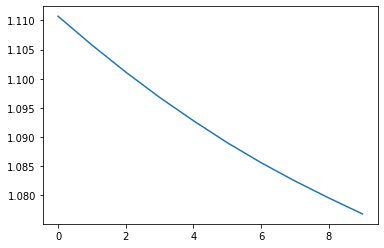

In [34]:
#Calculate Normalization Factor
S = np.average(I)**2
#
autoCor = np.zeros(int(F/2))
autoCor[0] = np.average(I*I)
for i in range(1,int(F/2)):
    autoCor[i] = np.average(I[i:]*I[:-i])
plt.plot(np.arange(10),autoCor[:10]/S)
temp = autoCor[:10]/S

### Non-Bleaching Case

In [37]:
# original
import numpy as np
import scipy as sp
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
import math
from math import pi
import matplotlib.pyplot as plt

N = int(np.average(numWalk))
N0 = uniform(-r3,r3,(N,2))
I = np.zeros(int(F))

for i in range(Nt):
    N0 = step(N0)
    if(i>=(Nt-int(F))):
        I[i-Nt+int(F)] = illFunc(N0)
    

In [60]:
#Density error run
import numpy as np
import scipy as sp
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
import math
from math import pi
import matplotlib.pyplot as plt
f = 8
N = int(np.average(numWalk))*f
N0 = uniform(-r3,r3,(N,2))
I = np.zeros(int(F))

for i in range(Nt):
    N0 = step(N0)
    if(i>=(Nt-int(F))):
        I[i-Nt+int(F)] = illFunc(N0)
    

In [31]:
# systematic error run
import numpy as np
import scipy as sp
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
import math
from math import pi
import matplotlib.pyplot as plt

N = int(np.average(numWalk))+4 #add 4 to observe systematic error with
N0 = uniform(-r3,r3,(N,2))
I = np.zeros(int(F))

for i in range(Nt):
    N0 = step(N0)
    if(i>=(Nt-int(F))):
        I[i-Nt+int(F)] = illFunc(N0)
    

#### Correlation Func

In [61]:
#Calculate Normalization Factor
S = np.average(I)**2
#
autoCor = np.zeros(int(F/2))
autoCor[0] = np.average(I*I)
for i in range(1,int(F/2)):
    autoCor[i] = np.average(I[i:]*I[:-i])


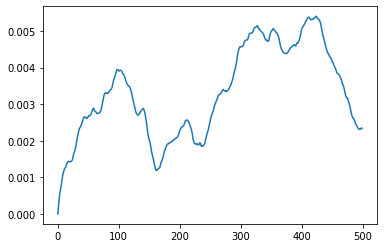

In [7]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 2x density(1)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

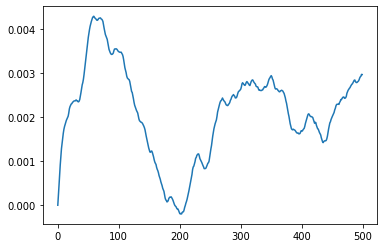

In [10]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 2x density(2)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

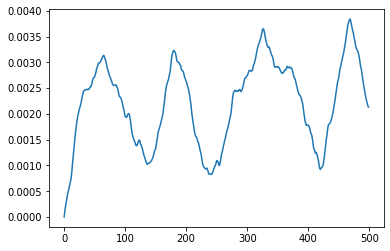

In [31]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 2x density(3)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

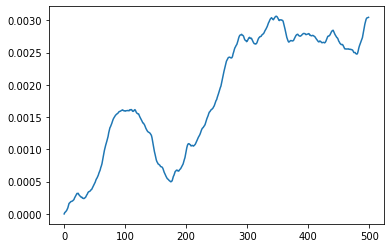

In [37]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 2x density(1)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

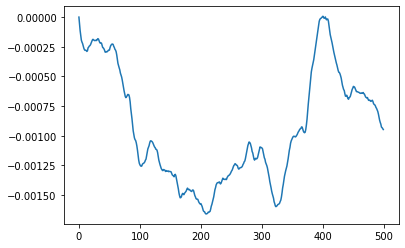

In [40]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 2x density(2)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

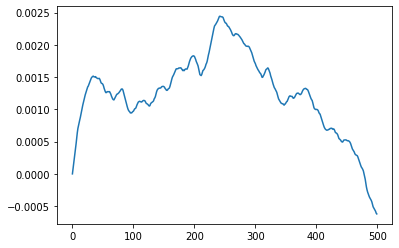

In [43]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 2x density(3)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

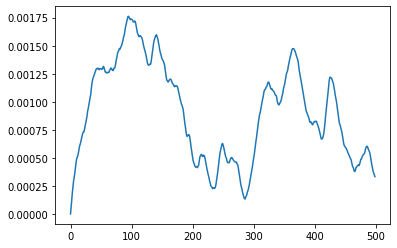

In [13]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 4x density(1)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

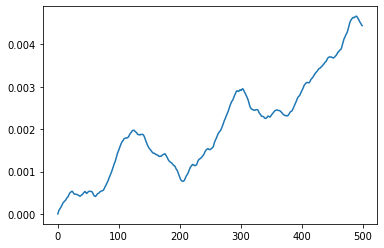

In [17]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 4x density(2)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

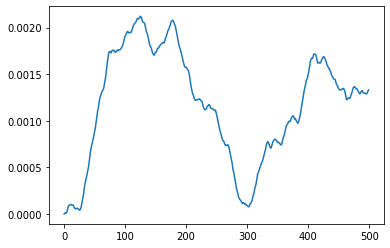

In [28]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 4x density(3)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

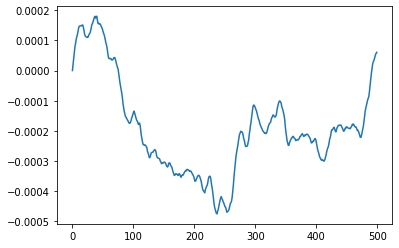

In [47]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 4x density(1)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

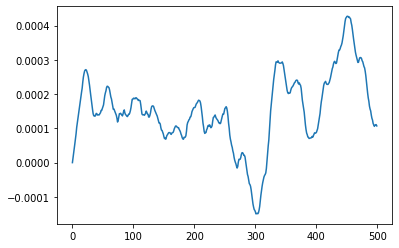

In [50]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 4x density(2)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

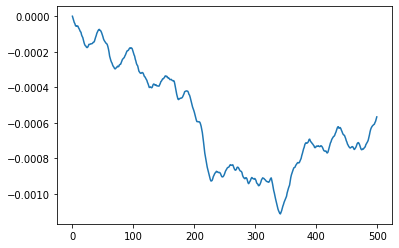

In [53]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 4x density(3)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

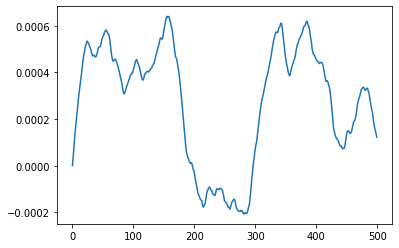

In [20]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 8x density(1)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

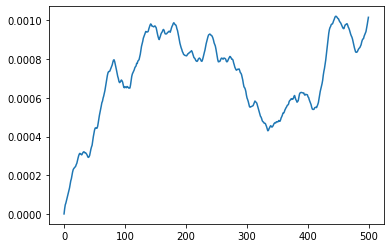

In [23]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 8x density(2)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

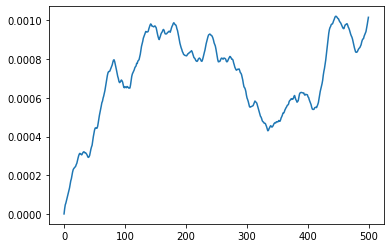

In [25]:
# tau=0.0025, r1 = 1.0, r2 = 4.5, r3 = 5.0; 8x density(3)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

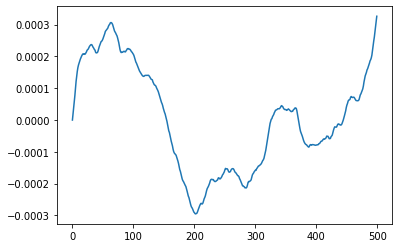

In [56]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 8x density(1)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

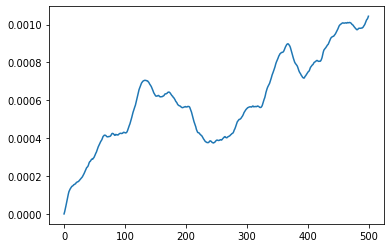

In [59]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 8x density(2)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

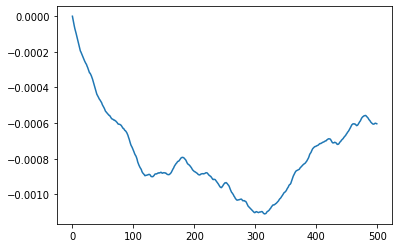

In [62]:
# tau=0.0025, r1 = 1.5, r2 = 7.0, r3 = 7.5; 8x density(3)
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

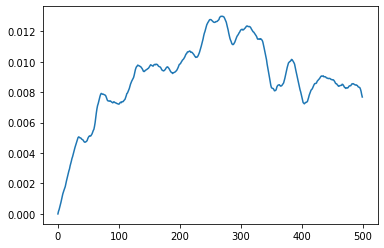

In [24]:
# tau=0.0025 original; r1 = 1.0, r2 = 4.5, r3 = 5.0
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

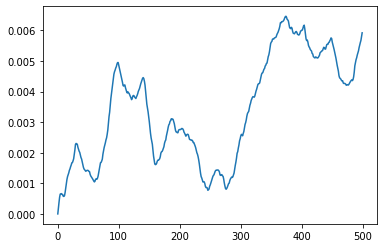

In [39]:
# tau=0.0025 original statistics case; r1 = 1.0, r2 = 4.5, r3 = 5.0
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

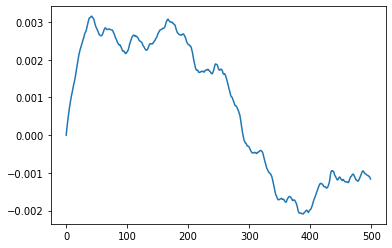

In [30]:
# tau=0.0025 systematic error case; r1 = 1.5, r2 = 7.0, r3 = 7.5
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

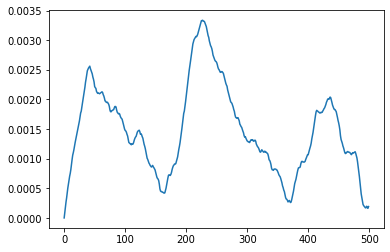

In [33]:
# tau=0.0025 statistics case; r1 = 1.5, r2 = 7.0, r3 = 7.5
dev=((1+(autoCor[0]/S-1)/(1+.04*np.arange(500))-autoCor[:500]/S)/(1+(autoCor[0]/S-1)/(1+.04*np.arange(500))))
plt.plot(np.arange(500),dev)

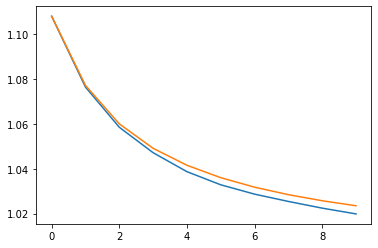

In [18]:
# tau=2.5
plt.plot(np.arange(10),autoCor[:10]/S)
plt.plot(np.arange(10),1+(autoCor[0]/S-1)/(1+.4*np.arange(10)))

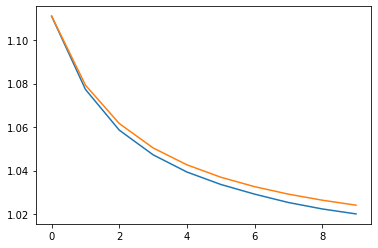

In [9]:
# tau=2.5; second run for observance of statistics.
plt.plot(np.arange(10),autoCor[:10]/S)
plt.plot(np.arange(10),1+(autoCor[0]/S-1)/(1+.4*np.arange(10)))

0.03228027597818128


We need to decide consitent parameters. Let's choose beam waist defined as 1 then K_Iplane=1. Then choose D=1, so diffusion time is 0.25.  eq used are
<center>
$\rho = \rho_0 e^{2(-x^2-y^2)/w^2}$,  
<br>
$\tau_d = \frac{w^2}{4D}$


Do this for next time(investigate .04). FCSexpert.com -Resource

02/27:  In the nonbleaching case, double the size of the simulation area, and increase the number of random walkers by 4,
and check to see if the systematic error shrinks. Could also half and quarter to get less computer time(should increase deviation)

03/12: Consider a higher density case, 4 times as many walkers, see how that works, if there are still systematics.  Compare this with other factors such as 2 times or 8 times.  This will get a handle on density effect. Do this both system sizes as well.  So, we will get 2x3 main plots but we may want to add a factor for statistics like 2x3x3 plots. 

In [17]:
import numpy as np
from numpy.linalg import norm
from numpy.random import normal
from numpy.random import uniform
from numpy.random import poisson
A = uniform(1,-1,2)
print(norm(A,axis=0))
print(norm(A))

0.36365190015201765
0.36365190015201765
